# We have the problem that wind forcing seems to dominate changes to modal decomposition, rather than topo shape!

## In this notebook, compare the same time slices over 100hr average. Focus on mode 1. Make movies maybe?

In [1]:
import sys
sys.path.append("/home/149/ab8992/tasman-tides/")
import xarray as xr
import ttidelib as tt
import scipy
import cmocean
import os
from pathlib import Path
cmap = cmocean.cm.dense_r
import matplotlib
import matplotlib.pyplot as plt
earth_cmap = matplotlib.colormaps["gist_earth"]
from datetime import timedelta

# import filtering
import numpy as np
import dask
dask.config.set({'logging.distributed': 'error'})
from dask.distributed import Client,default_client
import xrft


client = tt.startdask()
client

<Client: 'tcp://127.0.0.1:44567' processes=7 threads=28, memory=112.00 GiB>


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 112.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44567,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 112.00 GiB
Comm: tcp://127.0.0.1:42749,Total threads: 4
Dashboard: /proxy/37239/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:37117,


## First draft a function to calculate N(z)

$ \large N = \frac{-g}{\rho}\frac{\partial \rho}{\partial z} $


In [2]:
expt = "full-20"
t0 = 51629

filtered = xr.open_mfdataset(
    f"/g/data/nm03/ab8992/postprocessed/{expt}/lfiltered/t0-{t0}/Slow*.nc",
    decode_times = False,
    decode_cf = False
)[["u","v"]]
raw = tt.collect_data(
    expt,
    rawdata = ["u","v","rho"],
    timerange = [t0 - 75,t0 + 75],
)

egf = xr.open_mfdataset(
    f"/g/data/nm03/ab8992/postprocessed/{expt}/vertical_eigenfunctions/vmode-t0-{t0}.nc",
    decode_times = False,
    decode_cf = False
)

loading u...	done.
loading v...	done.
loading rho...	done.


In [3]:
U = (filtered.u * egf.U.isel(zl = slice(0,96))).integrate("zl").load()

## Plot only on shelf

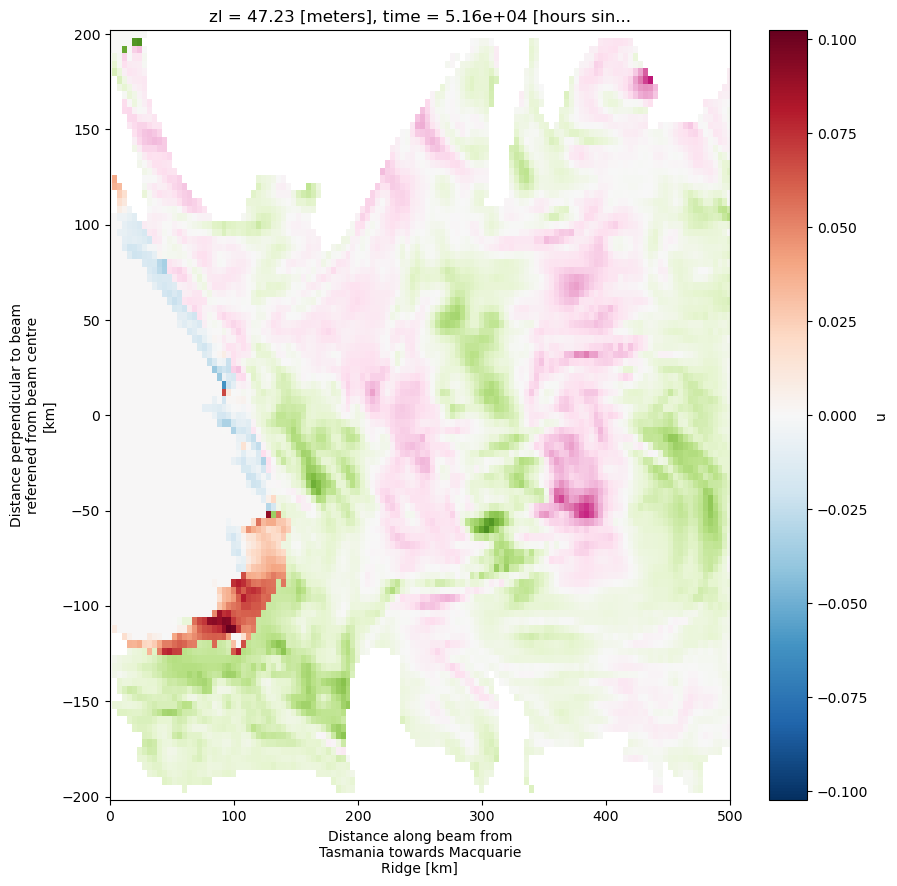

In [37]:


def plotshelf(data,cutoff):
    cutoff = 150
    shelf = data.where(raw.bathy * -1 < cutoff,np.nan)
    notshelf = data.where(raw.bathy * -1 >= cutoff,np.nan)
    

    fig,ax = plt.subplots(1,figsize = (10,10))
    shelf.isel(time = 50).sel(zl = 50,method = "nearest").plot(cmap = "RdBu_r")
    notshelf.isel(time = 50).sel(zl = 50,method = "nearest").plot(cmap = "PiYG",add_colorbar = False)
    # raw.bathy.where(raw.bathy < -5,np.nan).plot(add_colorbar = False,color = "black")
    # tt.plot_topo(ax,raw.bathy)
    ax.set_xlim(0,500)
    return fig

fig = plotshelf(filtered.u,150)

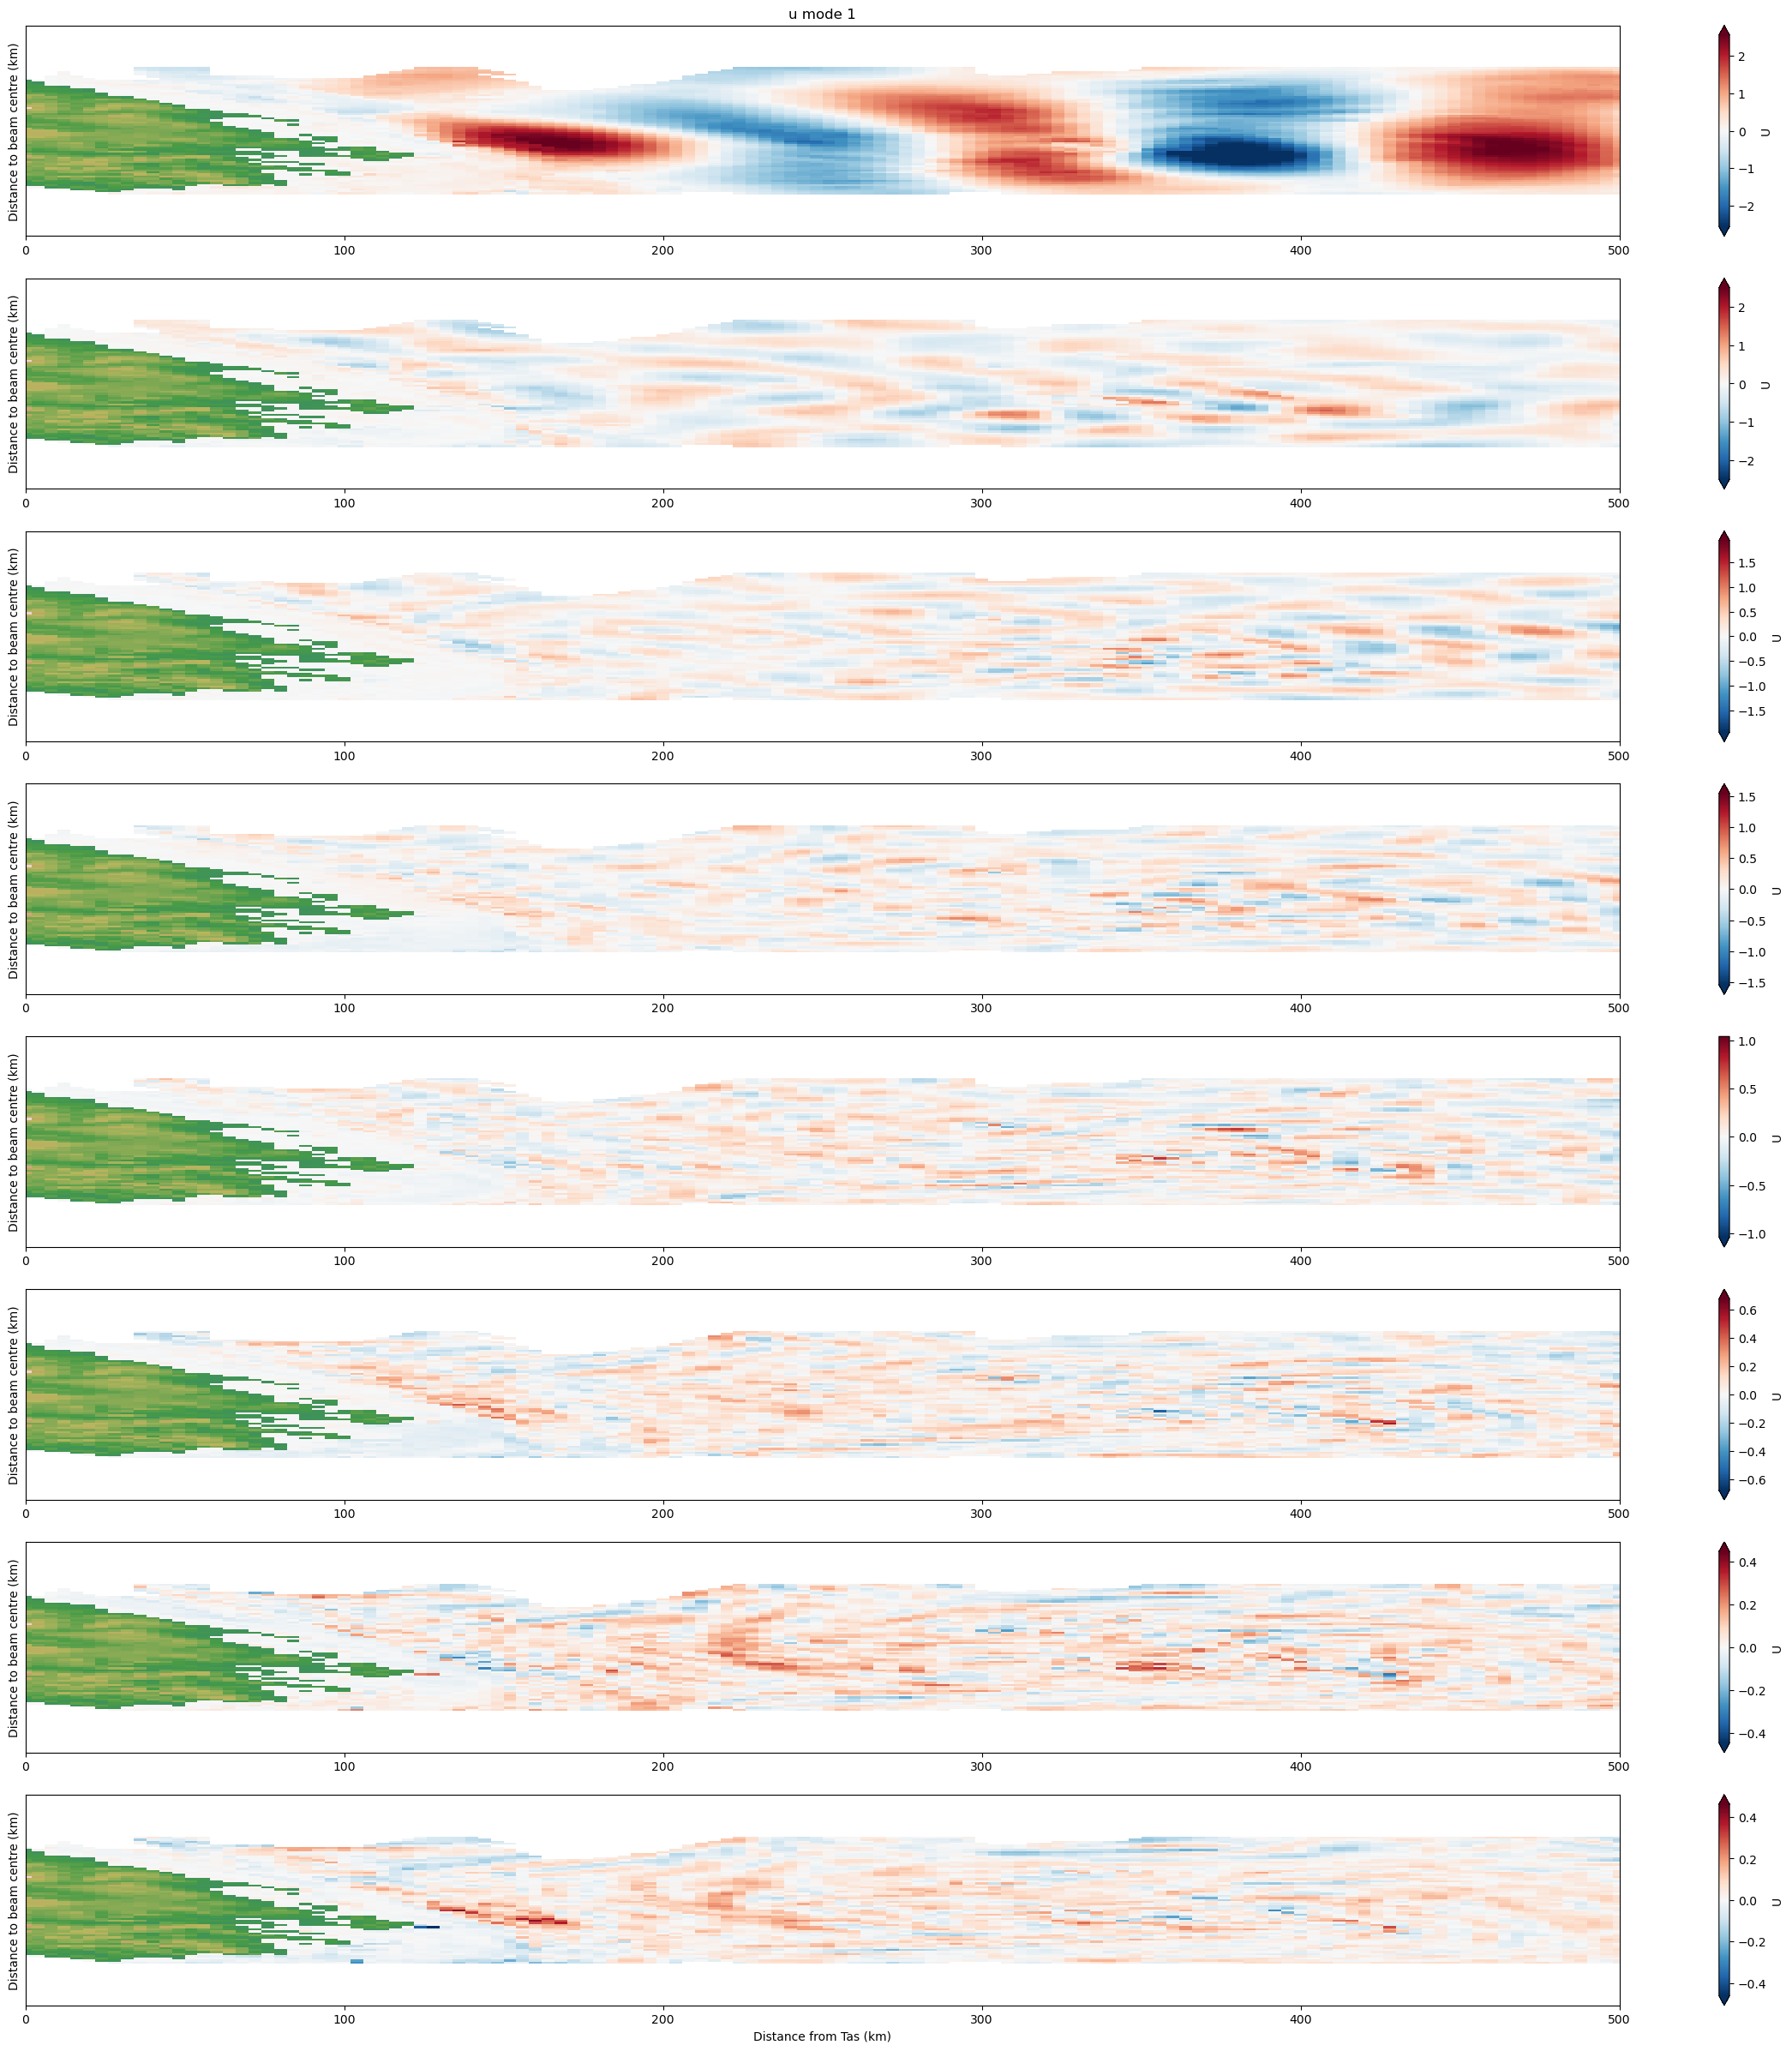

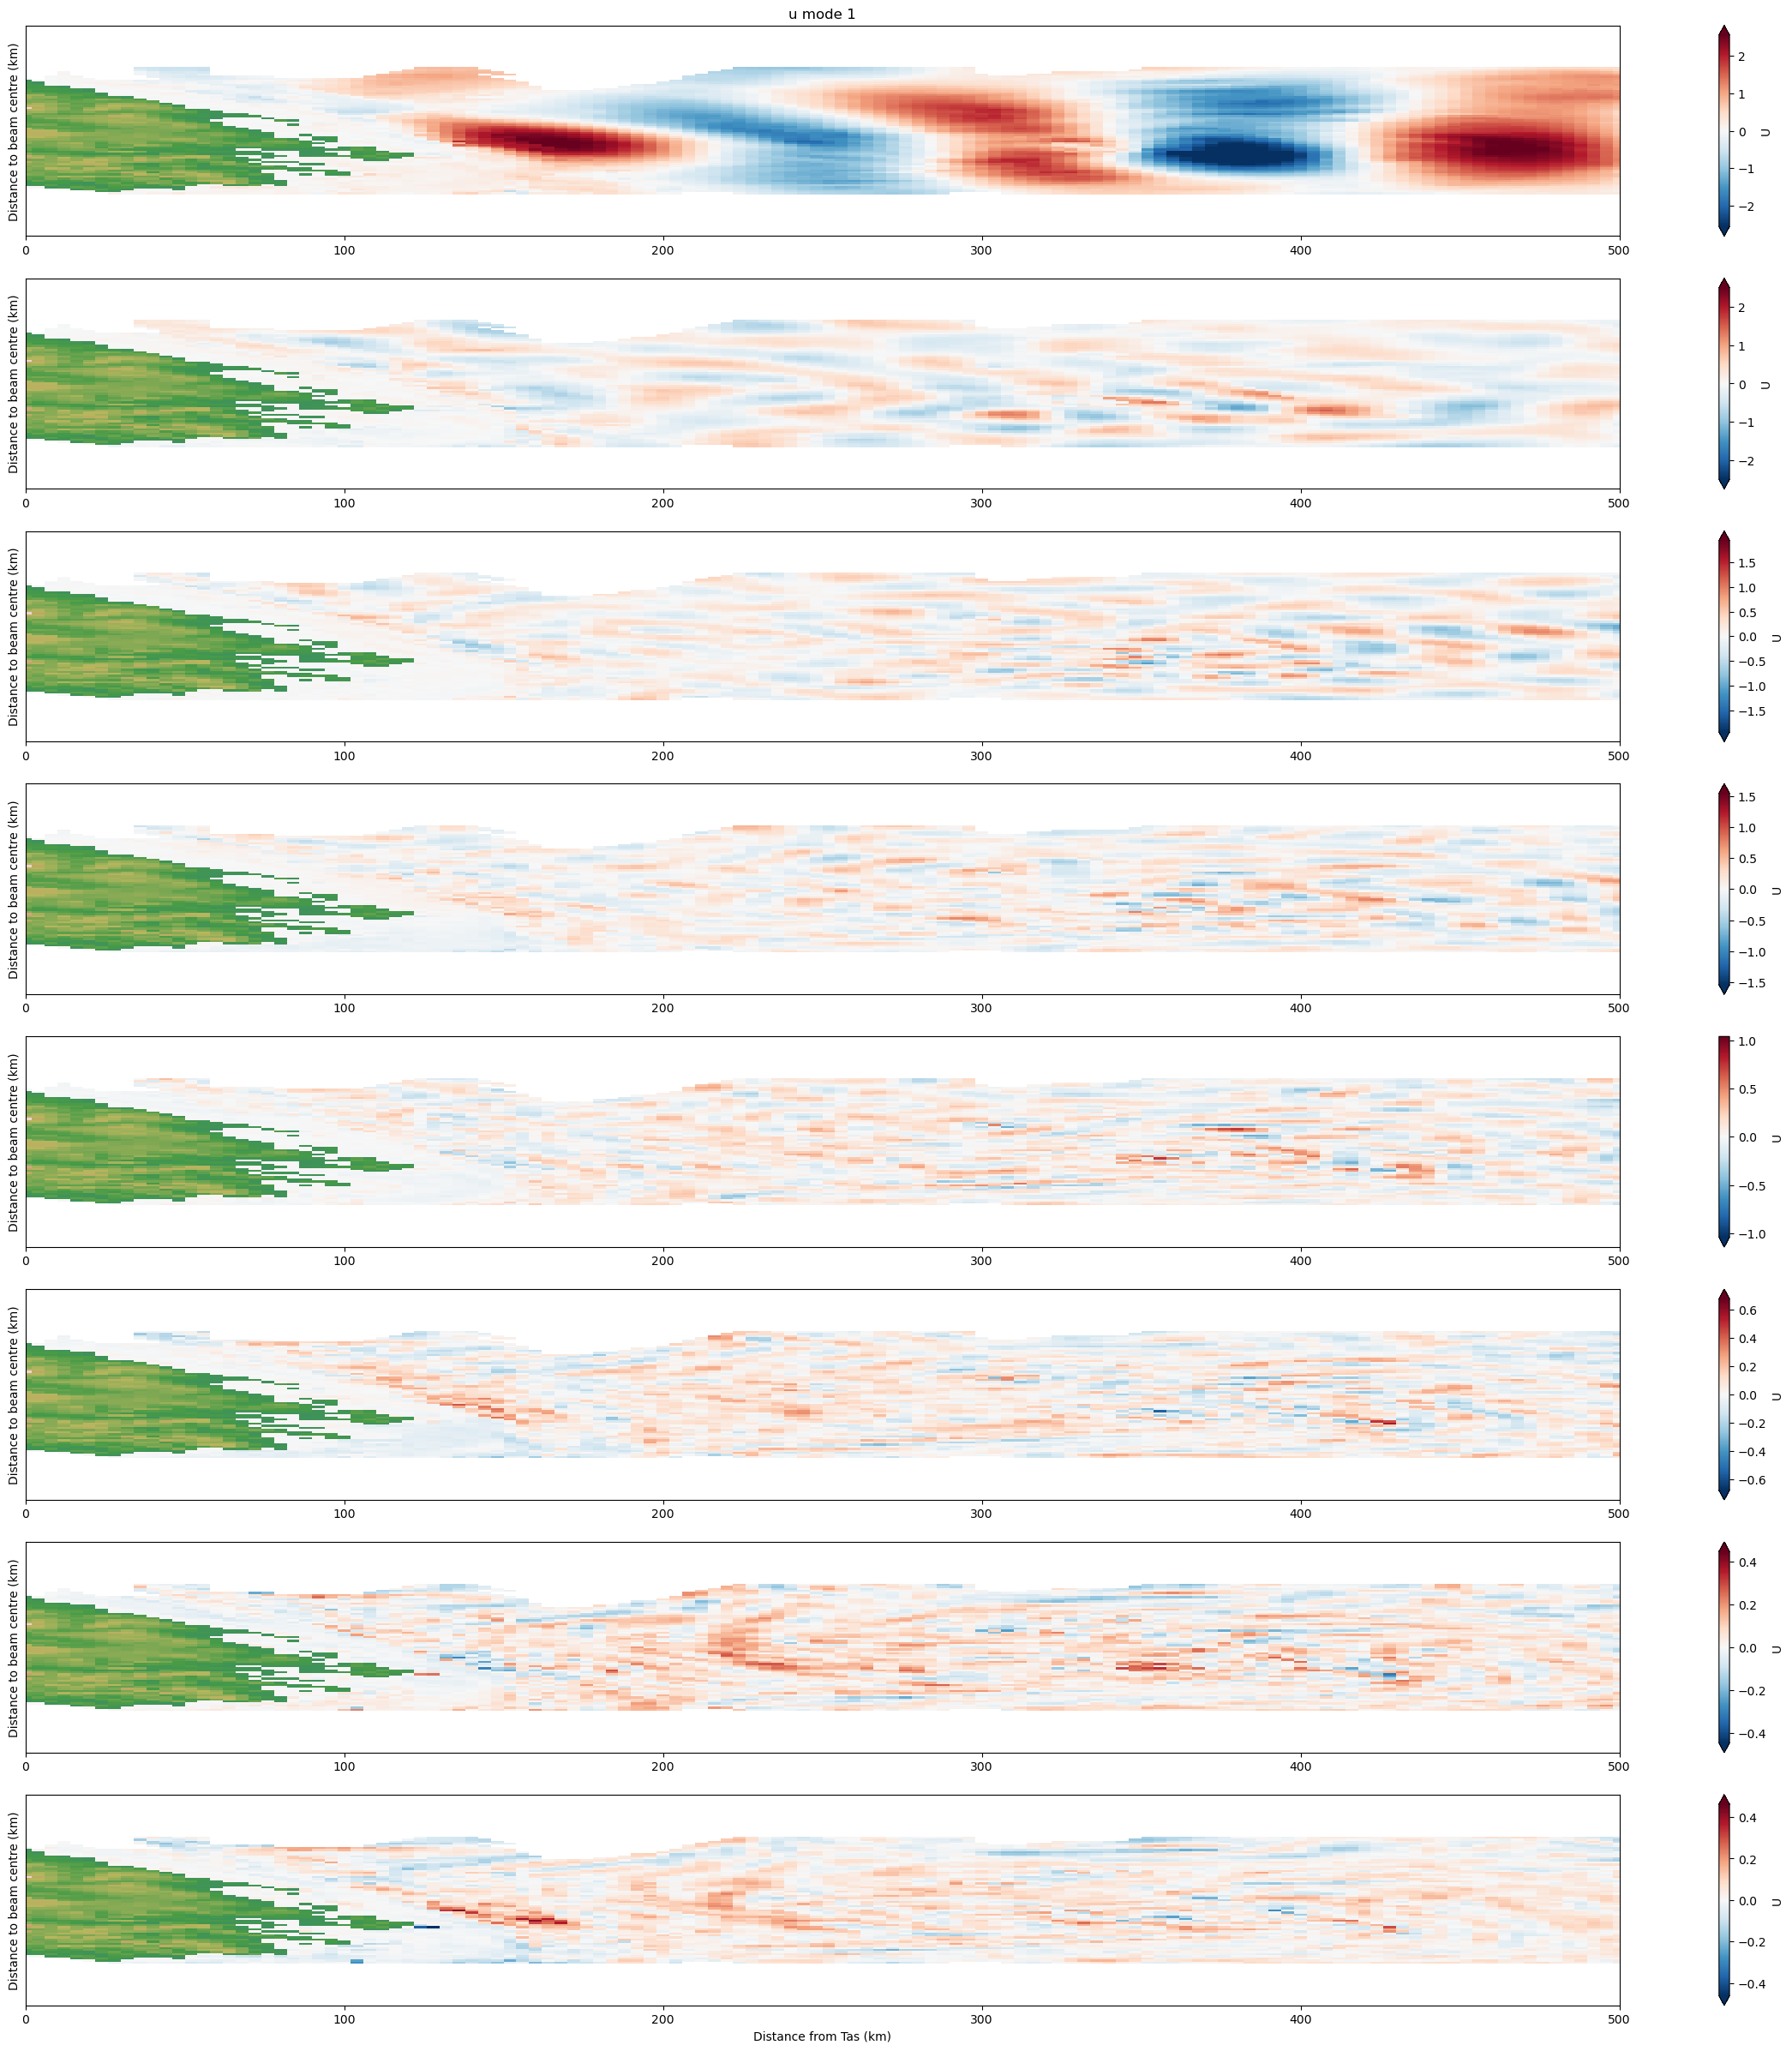

In [7]:
def PlotVmodes(data):
    fig,ax = plt.subplots(8,1,figsize = (30,30))

    for i in range(len(data.mode)):

        tp = data.U.isel(mode = i).sel(xb = slice(0,1400))
        vm = 0.7 * np.max(np.abs(tp))
        tp.plot(ax = ax[i],vmin = -1 * vm,vmax = vm,cmap = "RdBu_r")

        tt.plot_topo(ax[i],bathy = data.bathy)
        tt.plot_topo(ax[i],bathy = data.bathy)
        ax[i].set_xlim(0,500)
        ax[i].set_xlim(0,500)
        ax[i].set_title("")
        ax[i].set_title("")
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
        ax[i].set_yticks([])
        ax[i].set_xlabel("")
        ax[i].set_ylabel("Distance to beam centre (km)")
        ax[i].set_aspect('auto')
        ax[i].set_aspect('auto')

    ax[-1].set_xlabel("Distance from Tas (km)")
    ax[-1].set_xlabel("Distance from Tas (km)")
    fig.subplots_adjust(wspace=0.01)
    ax[0].set_title("u mode 1")
    # ax[0].set_title("v mode 1")
    return fig

PlotVmodes(xr.merge([U.rename("U").isel(time = 50),raw.bathy]))

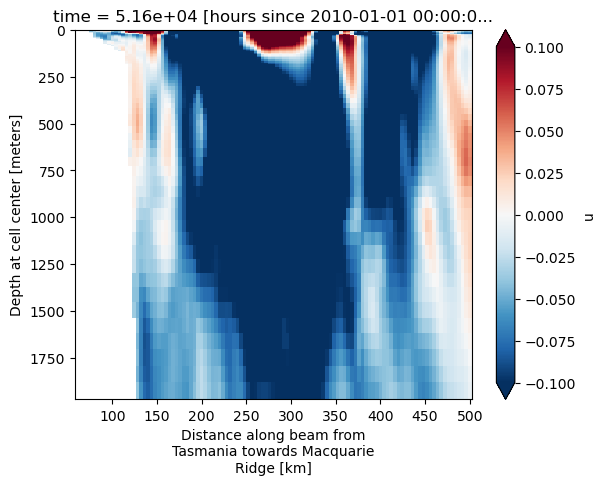

In [24]:
raw.sel(yb = 0,method = "nearest").u.isel(time = 50).sel(xb = slice(60,500),zl = slice(0,2000)).plot(vmin = -0.1,vmax = 0.1,cmap = "RdBu_r")
plt.gca().invert_yaxis()


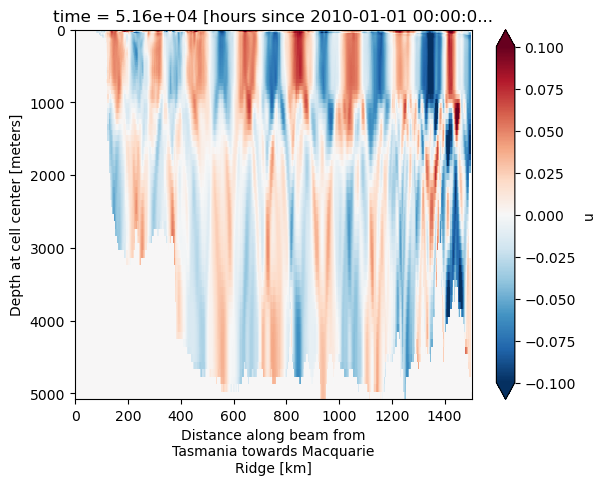

In [20]:
filtered.u.sel(yb = 0,method = "nearest").isel(time = 50).plot(vmin = -0.1,vmax = 0.1,cmap = "RdBu_r")
plt.gca().invert_yaxis()

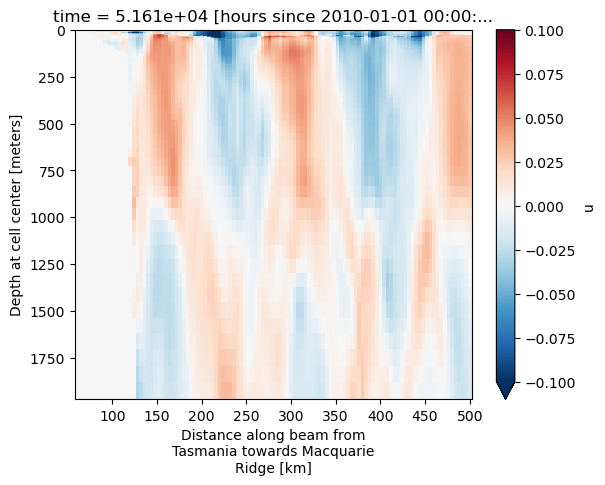

In [37]:
filtered.u.sel(yb = 0,method = "nearest").isel(time = 60).sel(xb = slice(60,500),zl = slice(0,2000)).plot(vmin = -0.1,vmax = 0.1,cmap = "RdBu_r")
plt.gca().invert_yaxis()

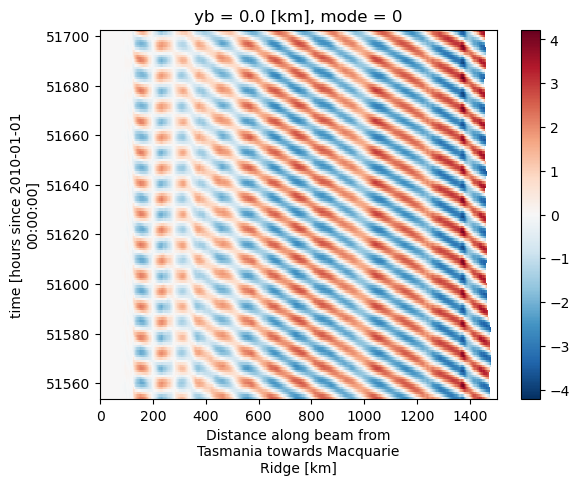

In [30]:
U.isel(mode=  0).sel(yb = 0,method = "nearest").plot(cmap = "RdBu_r")

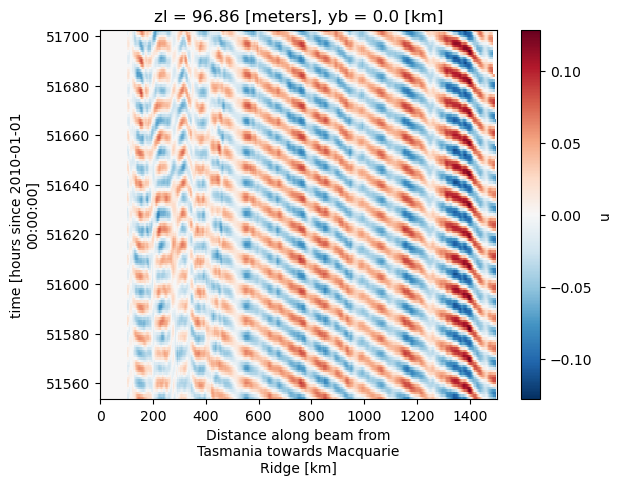

In [27]:
filtered.u.sel(yb = 0,zl = 100,method = "nearest").plot()


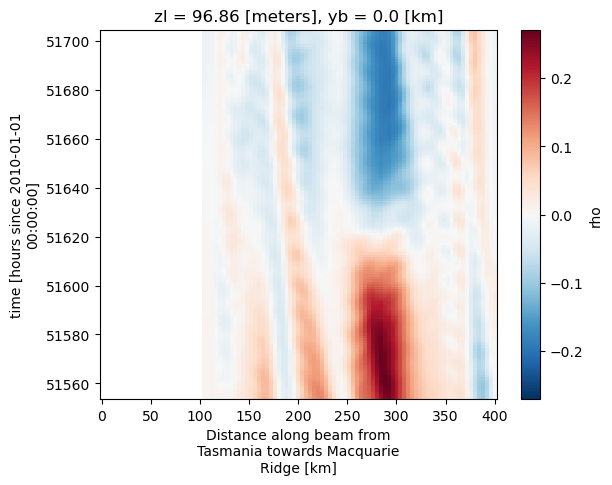

In [41]:
(raw.rho - raw.rho.mean("time")).sel(xb = slice(0,400)).sel(yb = 0,zl = 100,method = "nearest").plot()